In [1]:
# !pip install tslearn

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### Calculate Pearson correlations between the time series.

##### Correlations between the price series in the pre-period.

In [3]:
price = pd.read_csv('../data/median_comp_price.csv')
# price
price = price.drop('date.1', axis =1)
price = price.drop('date', axis =1)

# price.iloc[1:132]

In [4]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
Portland_median_price    216 non-null float64
SF_median_price          213 non-null float64
dtypes: float64(2)
memory usage: 3.5 KB


In [5]:
# price.iloc[1:142]

In [6]:
def pearson_corr(df,idx,dt,var):

    pre_df = df.iloc[1:idx]
    overall_pearson_r = pre_df.corr().iloc[0,1]
    print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")


    r, p = stats.pearsonr(pre_df.dropna()[f"Portland_{var}"], pre_df.dropna()[f"SF_{var}"])
    print(f"Scipy computed Pearson r: {r} and p-value: {p}")


    # Compute rolling window synchrony
    f,ax=plt.subplots(figsize=(12,4))
#     pre_df.rolling(window=4,center=True).mean().plot(ax=ax)
    pre_df.plot(ax=ax)
    ax.set(xlabel='Date',ylabel='Price')
    ax.set(title=f"Pearson Correlation between the Price Series Up to {dt}: r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r up to 2017-11-05: 0.82392139767056
Scipy computed Pearson r: 0.8239213976705598 and p-value: 1.272539354720841e-32


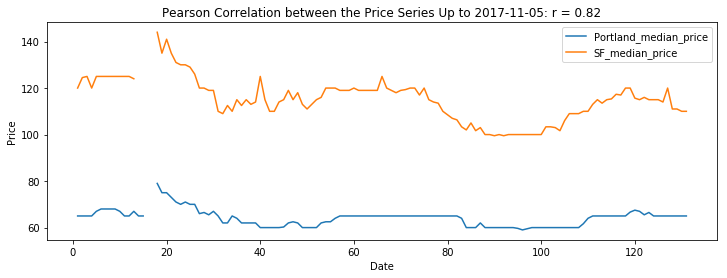

In [7]:
pearson_corr(price,132,'2017-11-05','median_price')

Pandas computed Pearson r up to 2018-01-14: 0.7918734566804466
Scipy computed Pearson r: 0.7918734566804457 and p-value: 1.049052037974517e-30


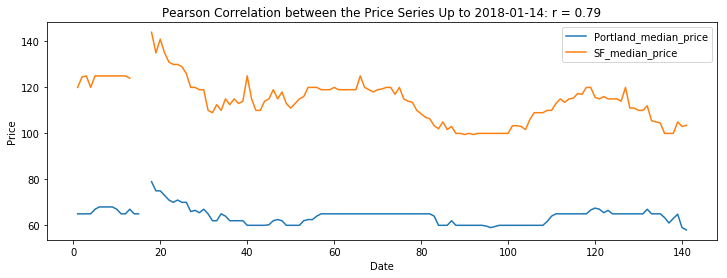

In [8]:
pearson_corr(price,142,'2018-01-14','median_price')

In [9]:

# # https://dtaidistance.readthedocs.io/en/latest/usage/dtw.html
# from scipy.spatial.distance import euclidean

# from tslearn.metrics import dtw

# comp = pre_price.fillna(method = 'ffill').iloc[1:]

# s1 = np.asarray(comp['SF_median_price'])

# s2 = np.asarray(comp['Portland_median_price'])

# dtw(s1,s2)

##### Correlations between the supply series in the pre-period.

In [10]:
supply = pd.read_csv('../data/comp_supply_avail.csv')
supply = supply.drop('file_scraped_dt.1', axis =1)

supply_t = supply.set_index(pd.DatetimeIndex(supply['file_scraped_dt']))
pre_supply = supply_t[:'2017-11-05'].resample('M').max()
pre_supply = pre_supply.drop('file_scraped_dt',axis=1).reset_index().drop('file_scraped_dt',axis=1)


Pandas computed Pearson r up to 2017-11-30: 0.708817122200652
Scipy computed Pearson r: 0.708817122200652 and p-value: 8.09073003875424e-06


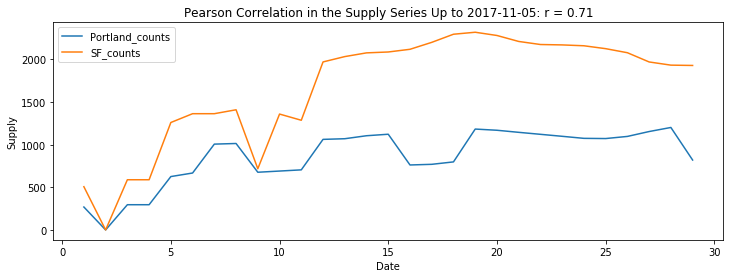

In [11]:
dt = "2017-11-30"
var = "counts"

# pre_df = pre_df.drop('file_scraped_dt', axis =1)
overall_pearson_r = pre_supply.corr().iloc[0,1]
print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")


r, p = stats.pearsonr(pre_supply.dropna()[f"Portland_{var}"], pre_supply.dropna()[f"SF_{var}"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
pre_supply.rolling(window=3,center=True).mean().plot(ax=ax)
ax.set(xlabel='Date',ylabel='Supply')
ax.set(title=f"Pearson Correlation in the Supply Series Up to 2017-11-05: r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r up to 2018-01-16: 0.771596621906278
Scipy computed Pearson r: 0.7715966219062782 and p-value: 1.4667681942517813e-07


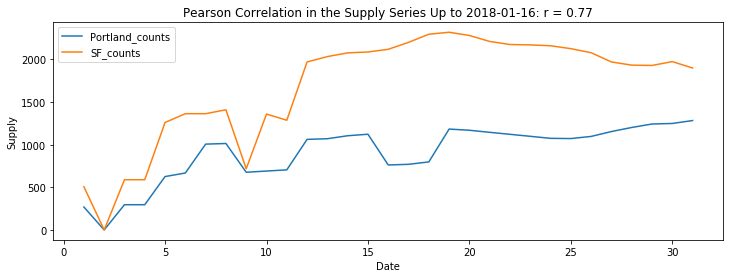

In [12]:
pre_supply = supply_t[:'2018-01-16'].resample('M').max()
pre_supply = pre_supply.drop('file_scraped_dt',axis=1).reset_index().drop('file_scraped_dt',axis=1)


dt = "2018-01-16"
var = "counts"

# pre_df = pre_df.drop('file_scraped_dt', axis =1)
overall_pearson_r = pre_supply.corr().iloc[0,1]
print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")


r, p = stats.pearsonr(pre_supply.dropna()[f"Portland_{var}"], pre_supply.dropna()[f"SF_{var}"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
pre_supply.rolling(window=3,center=True).mean().plot(ax=ax)
ax.set(xlabel='Date',ylabel='Supply')
ax.set(title=f"Pearson Correlation in the Supply Series Up to 2018-01-16: r = {np.round(overall_pearson_r,2)}");

##### Correlations between the demand series in the pre- and post- periods.

In [13]:
# Include both pre- and post-periods for the demand.

var = 'counts'

demand = pd.read_csv('../data/comp_weekly_demand.csv')
demand = demand.drop('date', axis =1)
demand = demand.iloc[:,1:3]
# pre_demand = demand[1:132]
# post_demand = demand[132:]
# post_demand.head()

Pandas computed Pearson r up to 2017-11-05: 0.8050626358670703
Scipy computed Pearson r: 0.8050626358670705 and p-value: 4.788252931558562e-31


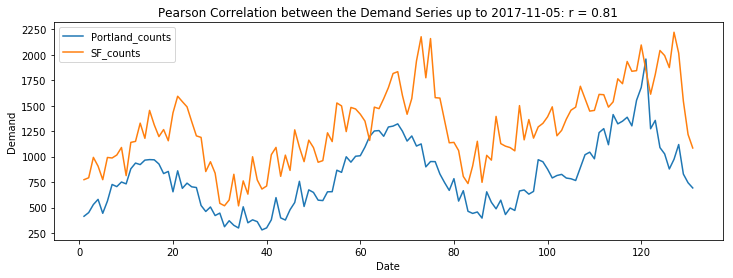

In [14]:
dt = '2017-11-05'

pre_demand = demand[1:132]

overall_pearson_r = pre_demand.corr().iloc[0,1]
print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")

r, p = stats.pearsonr(pre_demand.dropna()[f"Portland_{var}"], pre_demand.dropna()[f"SF_{var}"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
pre_demand.plot(ax=ax)
ax.set(xlabel='Date',ylabel='Demand')
ax.set(title=f"Pearson Correlation between the Demand Series up to {dt}: r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r up to 2017-11-05: 0.6169611302108876
Scipy computed Pearson r: 0.616961130210887 and p-value: 2.52326716655756e-10


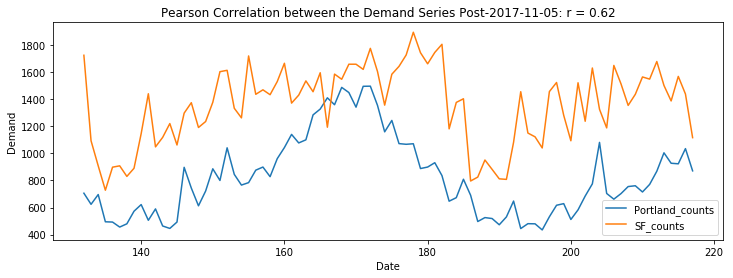

In [15]:
dt = '2017-11-05'

post_demand = demand[132:]

overall_pearson_r = post_demand.corr().iloc[0,1]
print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")

r, p = stats.pearsonr(post_demand.dropna()[f"Portland_{var}"], post_demand.dropna()[f"SF_{var}"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
post_demand.plot(ax=ax)
ax.set(xlabel='Date',ylabel='Demand')
ax.set(title=f"Pearson Correlation between the Demand Series Post-{dt}: r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r up to 2018-01-14: 0.7988381137079588
Scipy computed Pearson r: 0.7988381137079593 and p-value: 1.7532299462902337e-32


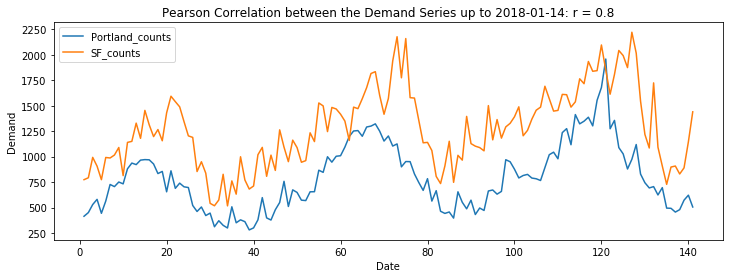

In [16]:
dt = '2018-01-14'

pre_demand = demand[1:142]

overall_pearson_r = pre_demand.corr().iloc[0,1]
print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")

r, p = stats.pearsonr(pre_demand.dropna()[f"Portland_{var}"], pre_demand.dropna()[f"SF_{var}"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
pre_demand.plot(ax=ax)
ax.set(xlabel='Date',ylabel='Demand')
ax.set(title=f"Pearson Correlation between the Demand Series up to {dt}: r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r up to 2018-01-14: 0.5912679543617695
Scipy computed Pearson r: 0.5912679543617696 and p-value: 1.869579825584273e-08


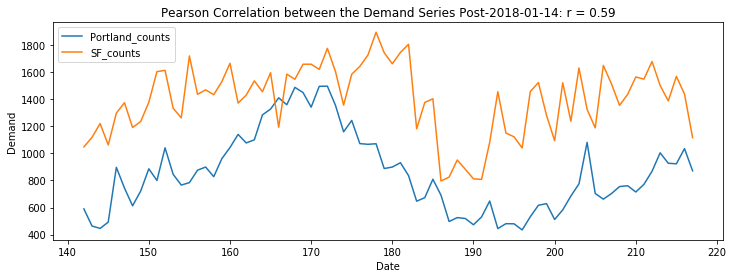

In [17]:
dt = '2018-01-14'

post_demand = demand[142:]

overall_pearson_r = post_demand.corr().iloc[0,1]
print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")

r, p = stats.pearsonr(post_demand.dropna()[f"Portland_{var}"], post_demand.dropna()[f"SF_{var}"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
post_demand.plot(ax=ax)
ax.set(xlabel='Date',ylabel='Demand')
ax.set(title=f"Pearson Correlation between the Demand Series Post-{dt}: r = {np.round(overall_pearson_r,2)}");

##### Correlations between the price series in the post-period.

Pandas computed Pearson r post- 2017-11-05: 0.4390446020120519
Scipy computed Pearson r: 0.4390446020120518 and p-value: 2.3497715605474578e-05


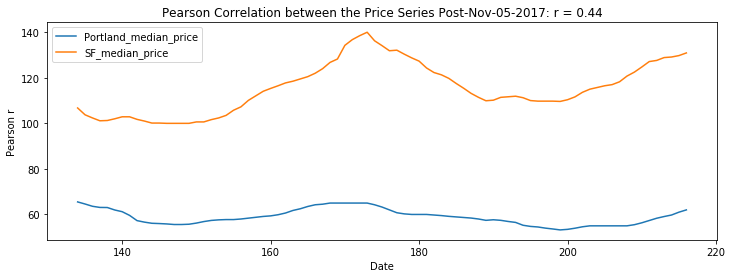

In [18]:
dt = "2017-11-05"
var = "median_price"

post_price = price.iloc[132:]
overall_pearson_r = post_price.corr().iloc[0,1]
print(f"Pandas computed Pearson r post- {dt}: {overall_pearson_r}")


r, p = stats.pearsonr(post_price.dropna()[f"Portland_{var}"], post_price.dropna()[f"SF_{var}"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
post_price.rolling(window=4,center=True).mean().plot(ax=ax)
ax.set(xlabel='Date',ylabel='Pearson r')
ax.set(title=f"Pearson Correlation between the Price Series Post-Nov-05-2017: r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r up to 2017-11-05: 0.7006526210760669
Scipy computed Pearson r: 0.7006526210760665 and p-value: 1.8445163909931646e-12


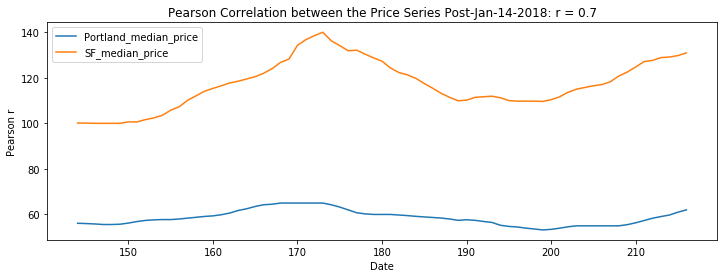

In [19]:
var = "median_price"

post_price = price.iloc[142:]
overall_pearson_r = post_price.corr().iloc[0,1]
print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")


r, p = stats.pearsonr(post_price.dropna()[f"Portland_{var}"], post_price.dropna()[f"SF_{var}"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
post_price.rolling(window=4,center=True).mean().plot(ax=ax)
ax.set(xlabel='Date',ylabel='Pearson r')
ax.set(title=f"Pearson Correlation between the Price Series Post-Jan-14-2018: r = {np.round(overall_pearson_r,2)}");